In [1]:
# This will cause all modules to the reloaded everytime a cell is run. This is useful for reloading the modules
# you are working on in VSCode. 
# Note that any pre-existing objects will not be changed even if their source code changes
%load_ext autoreload
%autoreload 2

In [2]:
# Enables imports from lfp repo
import sys; import os
sys.path.append('/content/learning_from_play')

from preparer import *

No pybullet installation found - which is fine if training


In [3]:
prep = Preparer()

In [4]:
# prep.args = PrepArgs('''
# fit_test
# --train_dataset UR5 UR5_slow_gripper UR5_high_transition
# --test_dataset UR5_slow_gripper_test
# -c
# -s DRIVE
# -d TPU
# -b 512
# -la 2048
# -le 512
# -lp 512
# -z 256
# -lr 3e-4
# -B 0.00003
# '''
# )
prep.args = PrepArgs('''
dvae_test
--train_dataset UR5_slow_gripper
--test_dataset UR5_slow_gripper_test
-c
-s DRIVE
-d GPU
-b 128
-la 512
-le 128
-lp 128
-z 64
-lr 3e-4
-B 0.0
'''
)

print(prep.args)

Namespace(actor_layer_size=512, batch_size=128, beta=0.0, bucket_name=None, colab=True, data_source='DRIVE', device='GPU', encoder_layer_size=128, fp16=False, from_tfrecords=False, gcbc=False, images=False, img_embedding_size=64, latent_dim=64, learning_rate=0.0003, num_distribs=None, planner_layer_size=128, qbits=None, resume=False, run_name='dvae_test', test_datasets=['UR5_slow_gripper_test'], tpu_name=None, train_datasets=['UR5_slow_gripper'], train_steps=200000, window_size_max=50, window_size_min=20)


In [5]:
prep.dashboard = PrepDashboard(prep.args)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tristanheywood (use `wandb login --relogin` to force relogin)


In [6]:
prep.paths = PrepPaths(prep.args)

Reading data from Google Drive
Storage path: /content/drive/My Drive/Robotic Learning


In [7]:
import tensorflow as tf
print(tf.config.list_physical_devices())
print(tf.distribute.get_strategy())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
prep.devices = PrepDevices(prep.args)

Tensorflow version 2.4.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
prep.dataloader = PrepDataloader(prep.args, prep.paths, prep.devices.NUM_DEVICES)

UR5_slow_gripper_test: 100%|██████████| 2/2 [00:00<00:00, 40.49it/s]{   'acts': TensorSpec(shape=(128, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(128, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(128, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(128, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(128, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSpec(shape=(128,), dtype=tf.float32, name=None),
    'tstep_idxs': TensorSpec(shape=(128, None, 1), dtype=tf.int32, name=None)}
{   'acts': TensorSpec(shape=(128, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(128, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(128, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(128, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(128, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSpec(shape=(12

In [10]:
prep.model = PrepModel(prep.args, prep.devices.device_strategy, **prep.dataloader.dims_dict(), debug=True)

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


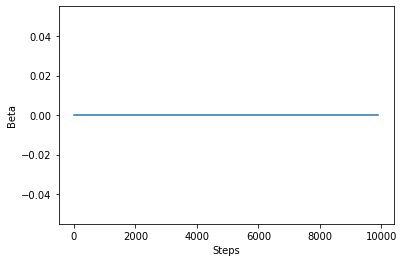

In [11]:
prep.utils = PrepUtils(prep.args, prep.paths.STORAGE_PATH)

In [12]:
from keras.utils.layer_utils import count_params
count_params(prep.model.model.trainable_weights)
prep.model.model.summary

<bound method Model.summary of <lfp.model_v2.LFPNet object at 0x7f622a419c10>>

In [15]:
prep.model.model.summary()

Model: "lfp_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         multiple                  1102944   
_________________________________________________________________
model_2 (Functional)         multiple                  329952    
_________________________________________________________________
model (Functional)           (None, None, 7)           3343879   
Total params: 4,776,801
Trainable params: 4,776,775
Non-trainable params: 26
_________________________________________________________________


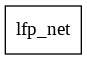

In [16]:
from keras.utils import plot_model
plot_model(prep.model.model, expand_nested=True)

In [14]:
prep.do_one_epoch()

20/20 [==============================] - 36s 691ms/step - train_loss: 0.1912 - valid_loss: 0.0000e+00 - train_act_with_enc_loss: 0.1912 - train_act_with_plan_loss: 0.1933 - valid_act_with_enc_loss: 0.0000e+00 - valid_act_with_plan_loss: 0.0000e+00 - reg_loss: 3.9157 - valid_reg_loss: 0.0000e+00 - valid_position_loss: 0.0000e+00 - valid_max_position_loss: 0.0000e+00 - valid_rotation_loss: 0.0000e+00 - valid_max_rotation_loss: 0.0000e+00 - beta: 0.0000e+00 - val_train_loss: 0.0000e+00 - val_valid_loss: 0.1693 - val_train_act_with_enc_loss: 0.0000e+00 - val_train_act_with_plan_loss: 0.0000e+00 - val_valid_act_with_enc_loss: 0.1638 - val_valid_act_with_plan_loss: 0.1693 - val_reg_loss: 0.0000e+00 - val_valid_reg_loss: 5.6582 - val_valid_position_loss: 0.0000e+00 - val_valid_max_position_loss: 0.0000e+00 - val_valid_rotation_loss: 0.0000e+00 - val_valid_max_rotation_loss: 0.0000e+00


In [14]:
history = prep.model.model.fit(
    prep.dataloader.train_dataset,
    validation_data = prep.dataloader.valid_dataset,
    epochs = 10000,
    steps_per_epoch = 20,
    validation_steps = 1,
    callbacks = [prep.utils.checkpoint_callback, prep.utils.step_logger]
)

lid_loss: 0.0000e+00 - train_act_with_enc_loss: 0.0289 - train_act_with_plan_loss: 0.0665 - valid_act_with_enc_loss: 0.0000e+00 - valid_act_with_plan_loss: 0.0000e+00 - reg_loss: 130.9866 - valid_reg_loss: 0.0000e+00 - valid_position_loss: 0.0000e+00 - valid_max_position_loss: 0.0000e+00 - valid_rotation_loss: 0.0000e+00 - valid_max_rotation_loss: 0.0000e+00 - beta: 0.0000e+00 - val_train_loss: 0.0000e+00 - val_valid_loss: 0.0662 - val_train_act_with_enc_loss: 0.0000e+00 - val_train_act_with_plan_loss: 0.0000e+00 - val_valid_act_with_enc_loss: 0.0285 - val_valid_act_with_plan_loss: 0.0662 - val_reg_loss: 0.0000e+00 - val_valid_reg_loss: 130.7931 - val_valid_position_loss: 0.0000e+00 - val_valid_max_position_loss: 0.0000e+00 - val_valid_rotation_loss: 0.0000e+00 - val_valid_max_rotation_loss: 0.0000e+00
Epoch 43/10000
20/20 [==============================] - 6s 304ms/step - train_loss: 0.0286 - valid_loss: 0.0000e+00 - train_act_with_enc_loss: 0.0286 - train_act_with_plan_loss: 0.0668 -